In [1]:
import numpy as np

from mereldet import Optimizer, calculate_cost, function_under_test, MUT_SCALE
from matplotlib import pyplot as plt

In [2]:
def create_training_data(n=10_000, size=2):
    rng = np.random.default_rng(seed=1234)
    return rng.uniform(low=-1, high=1, size=(n, size))

In [3]:
def plot_convergence(optimizer):
    plt.loglog(optimizer.trace["iteration"], optimizer.trace["cost"])
    plt.ylabel("Cost")
    plt.xlabel("Iteration count")

In [4]:
input = create_training_data()

CPU times: user 54.3 s, sys: 103 ms, total: 54.4 s
Wall time: 54.5 s


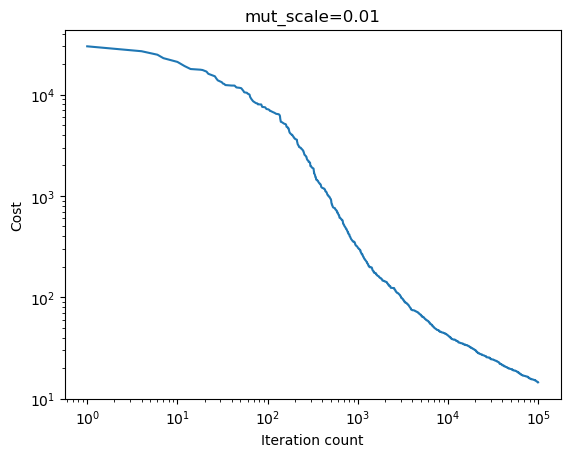

In [5]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={MUT_SCALE}");

CPU times: user 54.4 s, sys: 100 ms, total: 54.5 s
Wall time: 54.6 s


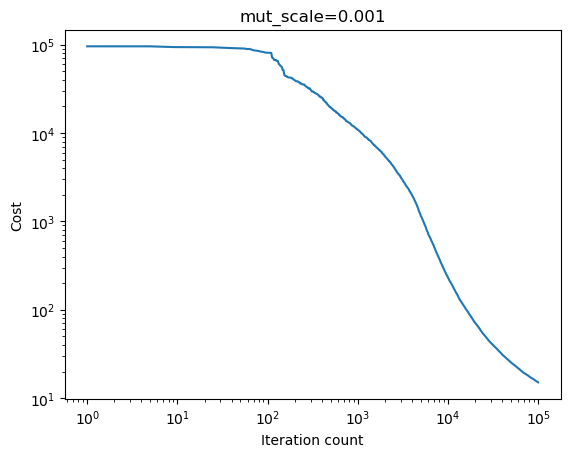

In [6]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=1e-1 * MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e-1 * MUT_SCALE}");

CPU times: user 54.8 s, sys: 418 ms, total: 55.2 s
Wall time: 55.3 s


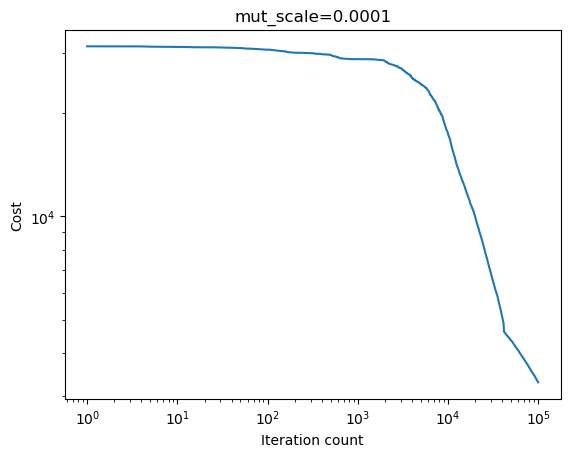

In [7]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=1e-2 * MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e-2 * MUT_SCALE}");

CPU times: user 56.2 s, sys: 1.63 s, total: 57.8 s
Wall time: 57.9 s


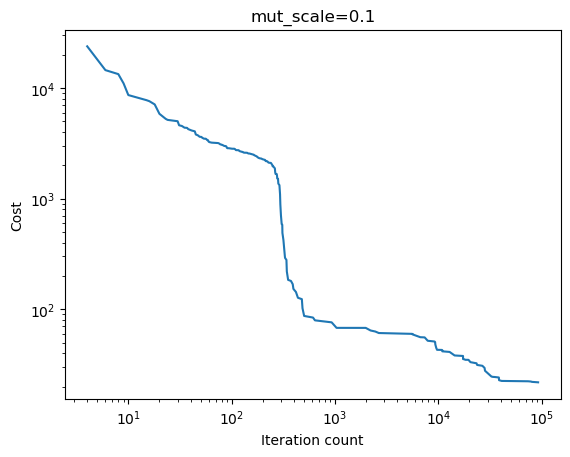

In [8]:
optimizer = Optimizer(function_under_test["prod"], calculate_cost, input)
%time mr = optimizer.optimize(mut_scale=10*MUT_SCALE, timeout=100_000)
plot_convergence(optimizer)
plt.title(f"mut_scale={1e1 * MUT_SCALE}");

In [9]:
mr.scale

array([[ 2.64177733,  0.60718437],
       [ 0.00739041, -0.0120549 ]])

In [10]:
mr.bias

array([ 1.09774131e+01, -1.14757632e-03])

In [11]:
input[0]

array([ 0.95339953, -0.23960853])

In [12]:
mr(np.array([1, 1]))

array([ 1.42263748e+01, -5.81206802e-03])

In [13]:
test = np.array([1., 1.])
print(function_under_test["prod"](test))
print(function_under_test["prod"](mr(test)))

1.0
-0.08268465820762845
